# New Section

In [2]:
from google.colab import files
uploaded = files.upload()



Saving student_data.csv to student_data.csv


In [3]:
import pandas as pd

# Replace with actual uploaded file name if different
df = pd.read_csv('student_data.csv', delimiter=';')

# Check structure
df.head()


,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Output
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
print("Class Distribution:")
print(df['Output'].value_counts())

print("\nMissing Values:")
print(df.isnull().sum().sort_values(ascending=False).head(10))


Class Distribution:
Output
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Missing Values:
Marital status            0
Application mode          0
Application order         0
Course                    0
evening attendance        0
Previous qualification    0
Nacionality               0
Mother's qualification    0
Father's qualification    0
Mother's occupation       0
dtype: int64


In [5]:
# Encode target variable
df['Target'] = df['Output'].map({
    'Dropout': 0,
    'Enrolled': 1,
    'Graduate': 2
})


In [6]:
# Feature columns
features = [
    'Age at enrollment', 'Gender', 'Scholarship holder',
    'Debtor', 'Tuition fees up to date', 'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)'
]

# Optional: convert categorical to numeric (Gender, Debtor, etc.)
df_encoded = pd.get_dummies(df[features + ['Target']], drop_first=True)

# Split into features (X) and target (y)
X = df_encoded.drop(columns='Target')
y = df_encoded['Target']


In [7]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [8]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       284
           1       0.47      0.34      0.39       159
           2       0.81      0.90      0.85       442

    accuracy                           0.75       885
   macro avg       0.68      0.66      0.67       885
weighted avg       0.73      0.75      0.74       885



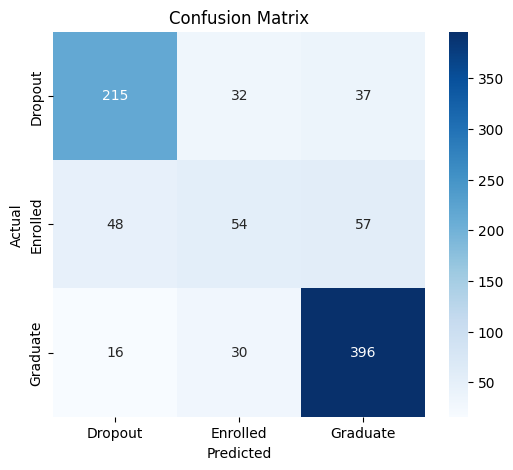

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test)

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dropout', 'Enrolled', 'Graduate'],
            yticklabels=['Dropout', 'Enrolled', 'Graduate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


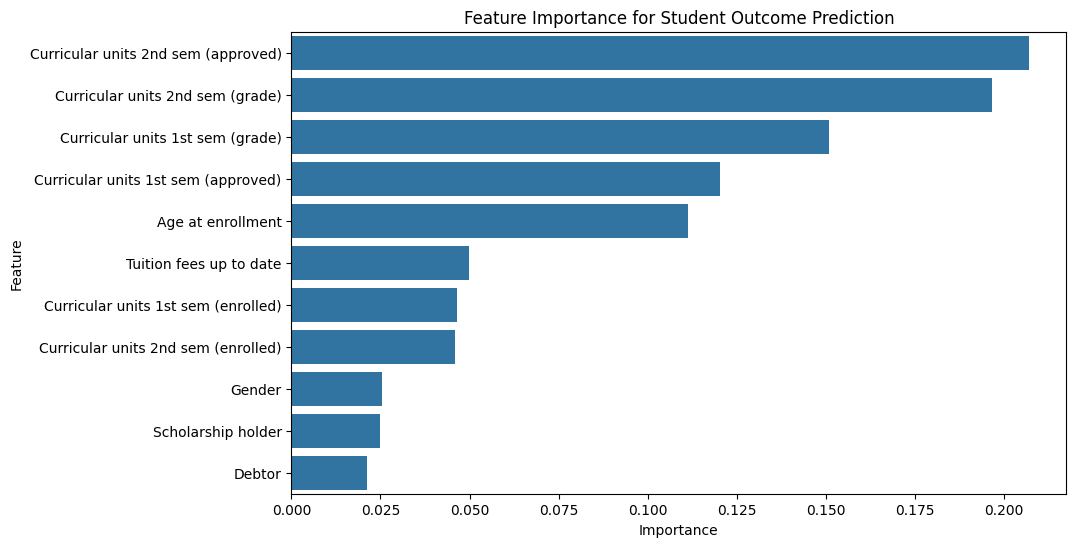

In [10]:
import pandas as pd

# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Student Outcome Prediction')
plt.show()
